In [1]:
import pandas as pd
import ivolat3 as iv
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
%matplotlib inline

In [2]:
def option(k,r,q,t,sigma,k1,r1,q1,t1,sigma1):
    
    call = {}
    callp = {}
    
    for i in range(18000, 22000):
        price = iv.prem_call(i,k,r,q,t/365,sigma)
        delta = iv.delta_call(i,k,r,q,t/365,sigma)
        gamma = iv.gamma(i,k,r,q,t/365,sigma)
        theta = iv.theta_call(i,k,r,q,t/365,sigma)
        vega = iv.vega(i,k,r,q,t/365,sigma)
        
        price1 = iv.prem_call(i,k1,r1,q1,t1/365,sigma1)
        delta1 = iv.delta_call(i,k1,r1,q1,t1/365,sigma1)
        gamma1 = iv.gamma(i,k1,r1,q1,t1/365,sigma1)
        theta1 = iv.theta_call(i,k1,r1,q1,t1/365,sigma1)
        vega1 = iv.vega(i,k1,r1,q1,t1/365, sigma1)
        
        call[i] = price, delta, gamma, theta, vega
        
        callp[i] = price1, delta1, gamma1, theta1, vega1
 
    call = pd.DataFrame(call)
    call = call.T
    call.columns = ['price', 'delta', 'gamma', 'theta','vega']
    callp = pd.DataFrame(callp)
    callp = callp.T
    callp.columns = ['price', 'delta','gamma', 'theta', 'vega']
    
    fig = plt.figure(figsize=(10,15))
    ax = plt.subplot(5,1,1)
    ax.plot(call['price'], color='blue')
    ax.plot(callp['price'], color='green')
    plt.title('Price')
    ax1 = plt.subplot(5,1,2)
    ax1.plot(call['delta'], color='blue')
    ax1.plot(callp['delta'], color='green')
    plt.title('Delta')
    ax2 = plt.subplot(5,1,3)
    ax2.plot(call['gamma'], color='blue')
    ax2.plot(callp['gamma'], color='green')
    plt.title('Gamma')
    ax3 = plt.subplot(5,1,4)
    ax3.plot(call['theta'], color='blue')
    ax3.plot(callp['theta'], color='green')
    plt.title('Theta')
    ax4 = plt.subplot(5,1,5)
    ax4.plot(call['vega'], color='blue')
    ax4.plot(callp['vega'], color='green')
    plt.title('Vega')

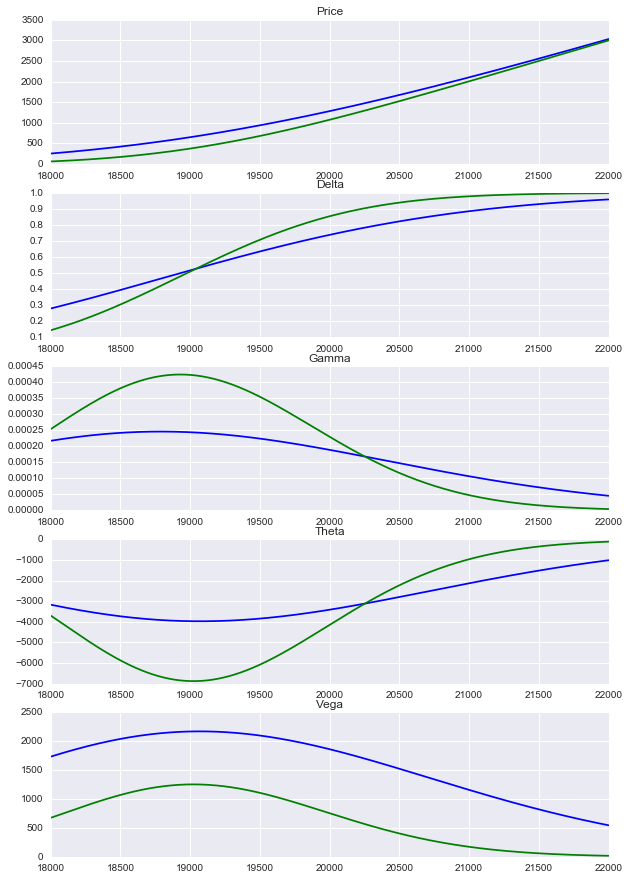

In [3]:
interact(option, k=19000, r=0.001, q =0, t=30, sigma=0.3, k1=19000, r1=0.001, q1=0,t1=30, sigma1=0.3)